<a href="https://colab.research.google.com/github/sravanthi200719/HDS5210_InClass/blob/master/week12_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [1]:
%matplotlib inline
import pandas as pd

condemnations = pd.read_csv('condemn.txt')
condemnations.shape

<ipython-input-1-4427bda89e9a>:4: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('condemn.txt')


(32586, 40)

In [2]:
import pandas as pd

# Load the dataset from the specified path
condemnations = pd.read_csv('condemn.txt')

# Display the shape of the dataframe to confirm data loading
condemnations.shape


<ipython-input-2-6de3bad11046>:4: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('condemn.txt')


(32586, 40)

In [3]:
# Convert 'InspectDate' column to datetime to facilitate filtering by date
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'], errors='coerce')

# Filter for rows where 'InspectDate' is between 1986 and 2014, inclusive
condemnations = condemnations[(condemnations['InspectDate'] >= '1986-01-01') & (condemnations['InspectDate'] <= '2014-12-31')]

# Check shape after filtering
condemnations.shape


(30232, 40)

In [4]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [5]:
import pandas as pd
import numpy as np


In [6]:
# Assuming 'condemnations' DataFrame has already been filtered and contains only data between 1986 and 2014
# Extract the year from the 'InspectDate' to facilitate grouping by year
condemnations['Year'] = condemnations['InspectDate'].dt.year

# Create a pivot table with years as rows and each unique Status value as columns, counting occurrences
by_year = pd.pivot_table(condemnations,
                         index='Year',
                         columns='Status',
                         values='InspectDate',
                         aggfunc=np.ma.count,
                         fill_value=0)

# Rename columns to match the expected output
by_year.columns = by_year.columns.astype(str)
by_year = by_year.rename(columns={'B': 'B', 'L': 'L', 'R': 'R', 'W': 'W'})  # Adjust column names if necessary
print(by_year)

Status     B    L   R    W
Year                      
1986      22   12  19  112
1987      91   20   8  361
1988     215   16  15  297
1989     277   15  11  432
1990     119   29   8  322
1991     139   18   4  351
1992     204   30   4  258
1993     185   47   2  193
1994     208   94   5  293
1995     176  127   0  268
1996     214  171   0  794
1997     281  328   0  878
1998     254  343   0  599
1999     272  283   0  826
2000     320  268   0  529
2001     381  262   0  296
2002     383  227   0  317
2003     361  201   0  282
2004     354  204   0  381
2005     410  237   0  345
2006     479  233  20  370
2007     613  262   0  341
2008     700  254   0  334
2009     785  223   0  200
2010    1161  193   0  154
2011    1028  275   0  107
2012     738  257   1   28
2013     185  209   1    2
2014      17  128   0    0


<ipython-input-6-b913d8bbe3b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condemnations['Year'] = condemnations['InspectDate'].dt.year


In [7]:
# Check the shape
assert by_year.shape == (29, 4), "Shape does not match expected output"

# Check the column names
assert list(by_year.columns) == ['B', 'L', 'R', 'W'], "Column names do not match expected output"

# Check the sum of each column
assert list(by_year.sum()) == [10572, 4966, 98, 9670], "Column sums do not match expected values"


In [8]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='Year'>

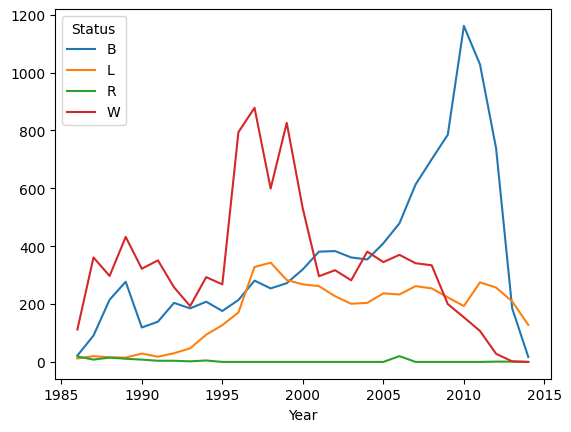

In [9]:
%matplotlib inline
by_year.plot()

---

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


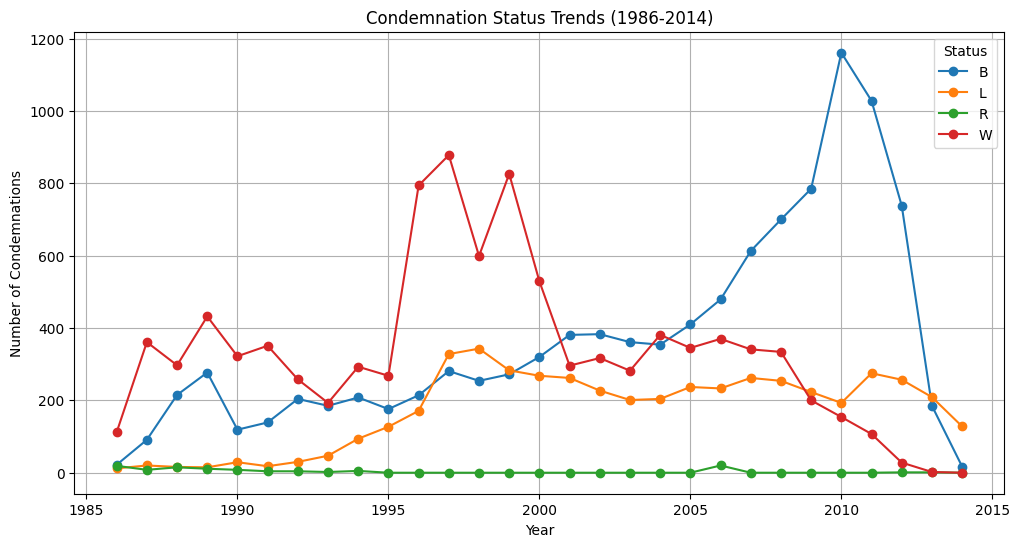

In [11]:
# Plot the 'by_year' DataFrame to show trends of each status type over the years
ax = by_year.plot(kind='line', figsize=(12, 6), marker='o', title='Condemnation Status Trends (1986-2014)')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Condemnations")
plt.grid(True)
plt.show()


# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `/data/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [12]:
import pandas as pd
meetings = ...

In [13]:
import pandas as pd

# Load the data from the CSV file
meetings = pd.read_csv('meetings.csv')

# Display the first few rows to understand the structure
meetings.head()


,meeting_uuid,meetingTitle,meetingId,userName,user_id,user_tags,endTime,startTime,email,participantSeconds,...,meetingDurationMinutes,popId,userType,billable,moderatorLess,start_time,total_highlights_created,smart_meeting,transcription_used,total_transcription_duration_minutes
0,418897-3b9f0feb-f8f4-4ae7-9464-eb983c30af60,Review Payer Websites,681568231,chris.rogers.amitechsolutions,3180644,NaN,2020-03-31 22:21:35,2020-03-31 21:00:22,chris.rogers@amitechsolutions.com,19386,...,81.2167,26,ENTERPRISE_PAID,True,True,2020-03-31 21:00:22.0,NaN,NaN,NaN,NaN
1,418897-14587f14-faf0-4879-9756-fe335357b413,Drew's Meeting,258719784,Drew.Marco,2717893,NaN,2020-03-31 21:30:37,2020-03-31 20:58:41,Drew.Marco@AmitechSolutions.com,7242,...,31.9333,25,ENTERPRISE_PAID,True,True,2020-03-31 20:58:41.0,NaN,NaN,NaN,NaN
2,418897-aa82b3f0-e3df-456a-80d5-daef7902c232,St. Luke's Project Discussion,415828450,eric.keeney,2692908,NaN,2020-03-31 22:48:43,2020-03-31 20:57:51,eric.keeney@amitechsolutions.com,38469,...,110.8667,25,ENTERPRISE_PAID,True,True,2020-03-31 20:57:51.0,NaN,NaN,NaN,NaN
3,418867-f5fadea7-75f8-4860-9a1e-090805ff6346,Amit's Meeting,275007771,amit.bhagat,2756615,NaN,2020-03-31 21:02:28,2020-03-31 20:34:43,amit.bhagat@amitechsolutions.com,6394,...,27.7500,110,ENTERPRISE_PAID,True,True,2020-03-31 20:34:43.0,NaN,NaN,NaN,NaN
4,418894-3a911019-1a97-4058-8bd4-035245c73bda,Andrea's Meeting,791412043,andrea.bryant.amitechsolutions,2673353,NaN,2020-03-31 20:49:46,2020-03-31 20:30:02,hr-dept@amitechsolutions.com,3363,...,19.7333,25,ENTERPRISE_PAID,True,True,2020-03-31 20:30:02.0,NaN,NaN,NaN,NaN


In [14]:
meetings['startDate'] = meetings['startTime'].str[0:10]

In [15]:
meetings['startDate'] = pd.to_datetime(meetings['startDate'])

In [16]:
before_filter = (meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] <= '2020-02-28')
during_filter = (meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] <= '2020-03-27')



In [17]:
meetings.loc[before_filter, 'Period'] = 'BEFORE'
meetings.loc[during_filter, 'Period'] = 'DURING'

In [18]:
meetings = meetings[meetings['Period'].isin(['BEFORE', 'DURING'])]

In [19]:
summary = meetings.pivot_table(index='userName', columns='Period', values='startDate', aggfunc='count', fill_value=0)

In [20]:
summary.columns = ['Before', 'During']

In [21]:
summary['pctChange'] = ((summary['During'] - summary['Before']) / summary['Before'].replace(0, np.nan)).round(4)

Replace any NaN values in 'pctChange' with 0 to indicate no change when 'Before' is 0
summary['pctChange'] = summary['pctChange'].fillna(0)

In [22]:
summary['pctChange'] = summary['pctChange'].fillna(0)

Display the final 'summary' DataFrame

In [23]:
print(summary)
calculated_mean_pctChange = summary['pctChange'].mean().round(2)
print("Calculated mean of pctChange:", calculated_mean_pctChange)

                                Before  During  pctChange
userName                                                 
Drew.Marco                          12      19     0.5833
amit.bhagat                         17      30     0.7647
andrea.bryant.amitechsolutions       5       3    -0.4000
angie.warren                         5       9     0.8000
chris.rogers.amitechsolutions        4       3    -0.2500
eric.keeney                         15      27     0.8000
eric.rodman                          4      12     2.0000
jeff.hatfield.amitechsolutions      13      26     1.0000
jennifer.patton.amitechs             5       7     0.4000
jessica.sikora                       3       7     1.3333
matt.allsup                          5       0    -1.0000
matt.brown.amitechsolutions          1       2     1.0000
melissa.menne                       10       9    -0.1000
michael.demos                        5      11     1.2000
paul.boal                           15      35     1.3333
paul.smith.ami

---

In [24]:
assert(len(summary) == 22)

In [25]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
